****TASK:Customer behavior based on transaction data****

<br>***Project type***: Exploratory Data Analysis</br>
<br>***Industry***: Coders Cave</br>
<br>***Done by***: DIVYASRI S B </br>

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Load dataset**

In [3]:
df=pd.read_csv('Hackathon_Working_Data.csv')

In [4]:
df.head(3)

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS


In [5]:
df.tail(3)

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN
26984,M3,N10,31,T6013,15.0,1.0,15.0,15.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,SAJ INDS,BISK FARM,BISK FARM JUST GINGER


**Dataset rows and columns**

In [6]:
df.shape

(26985, 14)

**Information on dataset**

In [7]:
df.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [9]:
df.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')

**Null Values**

In [10]:
df.isna().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [11]:
df.nunique()

MONTH           3
STORECODE      10
DAY            31
BILL_ID      6424
BILL_AMT     1453
QTY            45
VALUE         640
PRICE         492
GRP            80
SGRP          174
SSGRP         232
CMP           354
MBRD          643
BRD          1315
dtype: int64

In [12]:
df

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN


*Removing BRD,SGRP and SSGRP as they represent similar type of data*

In [13]:
df.drop(['BRD'], axis=1, inplace=True)
df.drop(['SGRP'], axis=1, inplace=True)
df.drop(['SSGRP'], axis=1, inplace=True)

*Dataset after removal*

In [14]:
df

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,CMP,MBRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),G C M M F,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,MONDELEZ INTERNATIONAL,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,GUJ TEA PROCESSORS,WAGH BAKRI
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,TATA CHEM,TATA
...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,PARLE PRODS,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,PARLE PRODS,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,PARLE PRODS,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,RECKITT BENCKISER,COLIN


***Visualizations from given dataset***

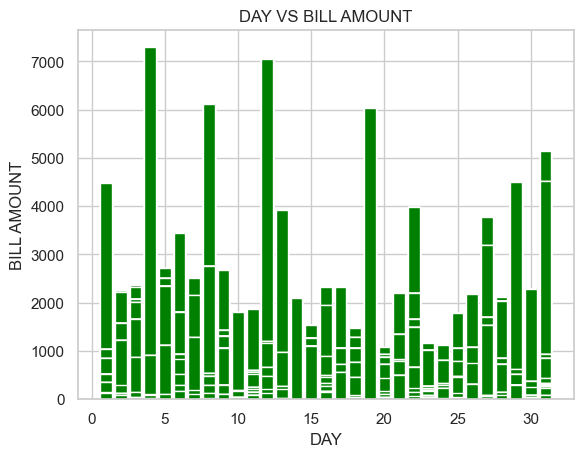

In [33]:
plt.bar(df['DAY'],df['BILL_AMT'],color='green')
plt.xlabel('DAY')
plt.ylabel('BILL AMOUNT')
plt.title('DAY VS BILL AMOUNT')
plt.show()

In [16]:
a = dict(df['STORECODE'].value_counts())
x = list(a.keys())
y = list(a.values())
a

{'N7': 5625,
 'N1': 4583,
 'N5': 4431,
 'N4': 3212,
 'N10': 2169,
 'N3': 1793,
 'N9': 1528,
 'N2': 1331,
 'N6': 1185,
 'N8': 1128}

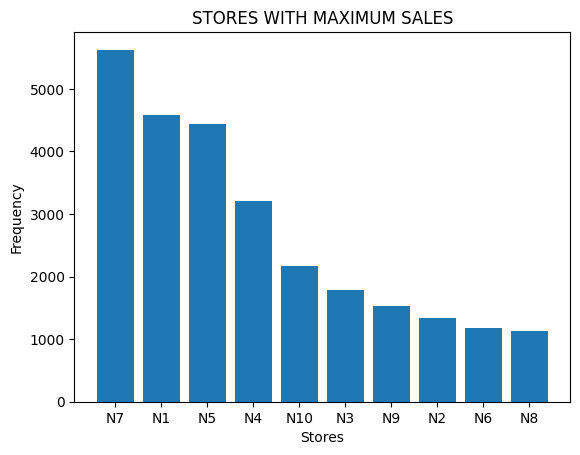

In [17]:
plt.bar(x,y)
plt.xlabel('Stores')
plt.ylabel('Frequency')
plt.title('STORES WITH MAXIMUM SALES')
plt.show()

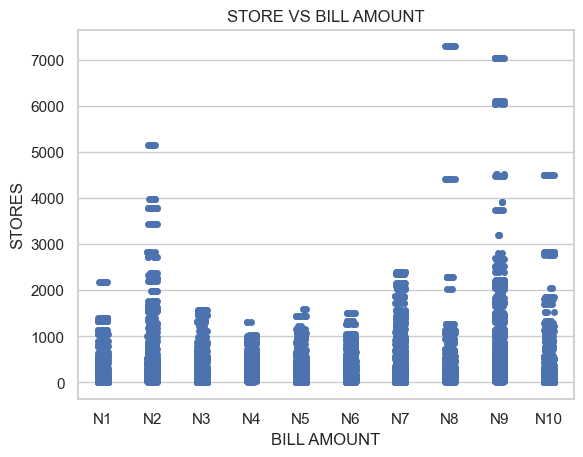

In [27]:
sns.set_theme(style="whitegrid")
sns.stripplot(x="STORECODE",y="BILL_AMT",data=df)
plt.xlabel('BILL AMOUNT')
plt.ylabel('STORES')
plt.title('STORE VS BILL AMOUNT')
plt.show()

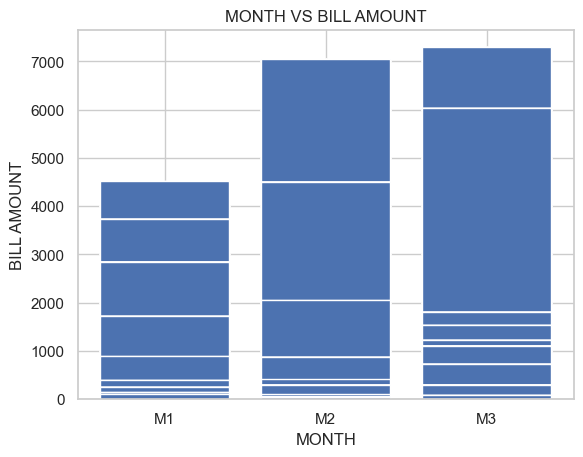

In [30]:
plt.bar(df['MONTH'],df['BILL_AMT'])
plt.title('MONTH VS BILL AMOUNT')
plt.xlabel('MONTH')
plt.ylabel('BILL AMOUNT')
plt.show()

In [20]:
b = dict(df['GRP'].value_counts().head(5))
x1 = list(b.keys())
y1 = list(b.values())

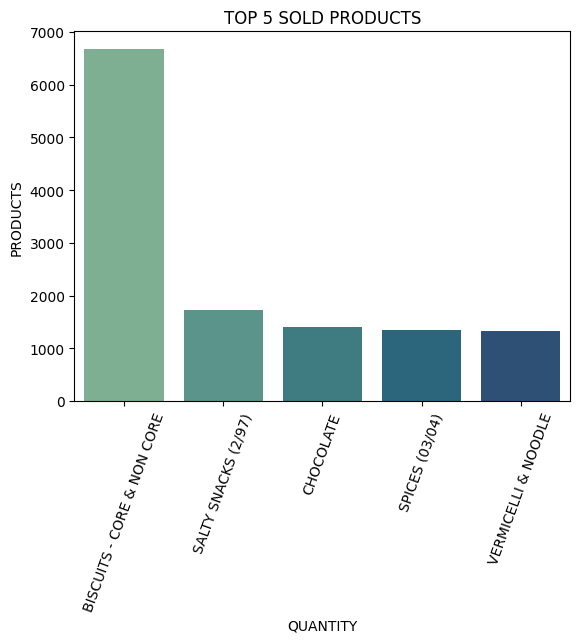

In [21]:
plt.xlabel('QUANTITY')
plt.ylabel('PRODUCTS')
plt.xticks(rotation=70) 
plt.title('TOP 5 SOLD PRODUCTS')
sns.barplot(x=x1,y=y1,palette='crest')
plt.show()